In [1]:
import utils
import pandas as pd
from datetime import datetime

c:\Users\agand\OneDrive\Escritorio\lakes\lake-algae-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import importlib
import utils

importlib.reload(utils)

<module 'utils' from 'c:\\Users\\agand\\OneDrive\\Escritorio\\lakes\\lake-algae-analysis\\notebooks\\utils.py'>

In [5]:
all_saved_logs = pd.read_csv(r"../data/all_saved_logs.csv")
all_lakes = pd.read_csv(f"{utils.get_data_directory()}/all_lakes.csv")
all_saved_logs = all_saved_logs.drop(["total_pixel_area"], axis = 1)
df = pd.merge(all_saved_logs,all_lakes, on='osmid', how='inner')
df["day"] = pd.to_datetime(df["day"], format='%Y-%m-%d')
df_2024 = df[(df["day"] > datetime(2024, 1, 1)) & (df["exists_true_image"] == True)]

In [6]:
df_grouped = df_2024.groupby('osmid').agg(
    max_water_area=('water_area', 'max'),
    min_cloud_area=('cloud_area', 'min'),
    total_area = ("total_pixel_area", "max"),
    max_water_with_no_clouds_area=('water_with_no_clouds_area', 'max'),
    count_records=('osmid', 'size')  # Conteo de registros por cada osmid
).reset_index()

df_grouped = df_grouped[["osmid", "max_water_area", "max_water_with_no_clouds_area", "count_records"]]
df_post_grouped =  pd.merge(df_2024,df_grouped, on='osmid', how='inner')
df_post_grouped.loc[:,"cloud_ratio"] = df_post_grouped["cloud_area"]/df_post_grouped["max_water_area"]
df_post_grouped.loc[:, "water_ratio"] = df_post_grouped["max_water_area"] / df_post_grouped["total_pixel_area"]

In [7]:
logs_with_chl = utils.calculate_chl(df_post_grouped)
logs_with_chl = utils.calculate_chl(logs_with_chl, "exp")


[25.48, 47.06, 68.64, 90.22000000000001, 111.80000000000001]
[30.832564751815084, 62.98251466426633, 128.6560876581312, 262.80927301379813, 536.8476163022507]


In [8]:
sorted_logs_exp = logs_with_chl.sort_values(by="chl_exp", ascending=False)
sorted_logs_lineal = logs_with_chl.sort_values(by="chl_lineal", ascending = False)

In [9]:
first_10_exp = sorted_logs_exp.groupby('osmid').first().reset_index().sort_values(by="chl_exp", ascending=False).head(10)
first_10_lineal = sorted_logs_lineal.groupby('osmid').first().reset_index().sort_values(by="chl_lineal", ascending=False).head(10)

In [10]:
first_10_exp

,osmid,day,exists_true_image,water_area,cloud_area,water_with_no_clouds_area,no_chl_area,chl_very_low_area,chl_low_area,chl_moderate_area,...,pixel_count,total_pixel_area,resolution,max_water_area,max_water_with_no_clouds_area,count_records,cloud_ratio,water_ratio,chl_lineal,chl_exp
102,16288976,2024-08-30,True,303271875.0,17234375.0,286690625.0,123650000.0,8125.0,10586875.0,19644375.0,...,481959,301224375,25,303271875.0,292830625.0,25,0.056828,1.006797,1.637147e+10,7.039277e+10
155,2810519,2024-08-28,True,705009375.0,87864375.0,622226250.0,176038125.0,901250.0,190400625.0,147178125.0,...,1144148,715092500,25,705009375.0,633815000.0,12,0.124629,0.985900,2.901856e+10,6.199974e+10
100,1624070,2024-04-24,True,348561250.0,773125.0,348560625.0,70001875.0,156250.0,66714375.0,119415000.0,...,1053149,658218125,25,491740000.0,398895625.0,18,0.001572,0.747078,1.966915e+10,4.387191e+10
182,357472,2024-01-05,True,51203500.0,0.0,51203500.0,10930800.0,7900.0,2430900.0,13609600.0,...,878103,87810300,10,82322300.0,51203500.0,13,0.000000,0.937502,3.246799e+09,8.429673e+09
168,332072,2024-03-12,True,156739500.0,0.0,156739500.0,13126275.0,89443575.0,46089000.0,6921000.0,...,1039287,233839575,15,234426600.0,181516500.0,12,0.000000,1.002510,5.029579e+09,6.880250e+09
89,156782315,2024-02-29,True,39443900.0,648100.0,39197100.0,13579800.0,4900.0,3733800.0,13326300.0,...,729241,72924100,10,69919400.0,43276100.0,32,0.009269,0.958797,1.862249e+09,4.198791e+09
93,1601368,2024-05-28,True,88682400.0,0.0,88682400.0,13535200.0,60216800.0,5110800.0,6479200.0,...,324139,129655600,20,111443600.0,110698800.0,12,0.000000,0.859536,2.521105e+09,3.892089e+09
250,58680339,2024-08-28,True,33342900.0,7316100.0,28363000.0,8856100.0,76900.0,2189900.0,9927000.0,...,361487,36148700,10,37179600.0,32551800.0,21,0.196777,1.028518,1.446834e+09,3.347555e+09
306,8026438,2024-02-01,True,57297000.0,121400.0,57177700.0,8785500.0,6552600.0,41798600.0,38900.0,...,583661,58366100,10,57422900.0,57422900.0,27,0.002114,0.983840,2.136862e+09,2.840171e+09
91,1579454,2024-01-05,True,35180250.0,0.0,35180250.0,2848900.0,422425.0,31897250.0,11575.0,...,1916439,47910975,5,45084825.0,35180250.0,11,0.000000,0.941012,1.512652e+09,2.023509e+09


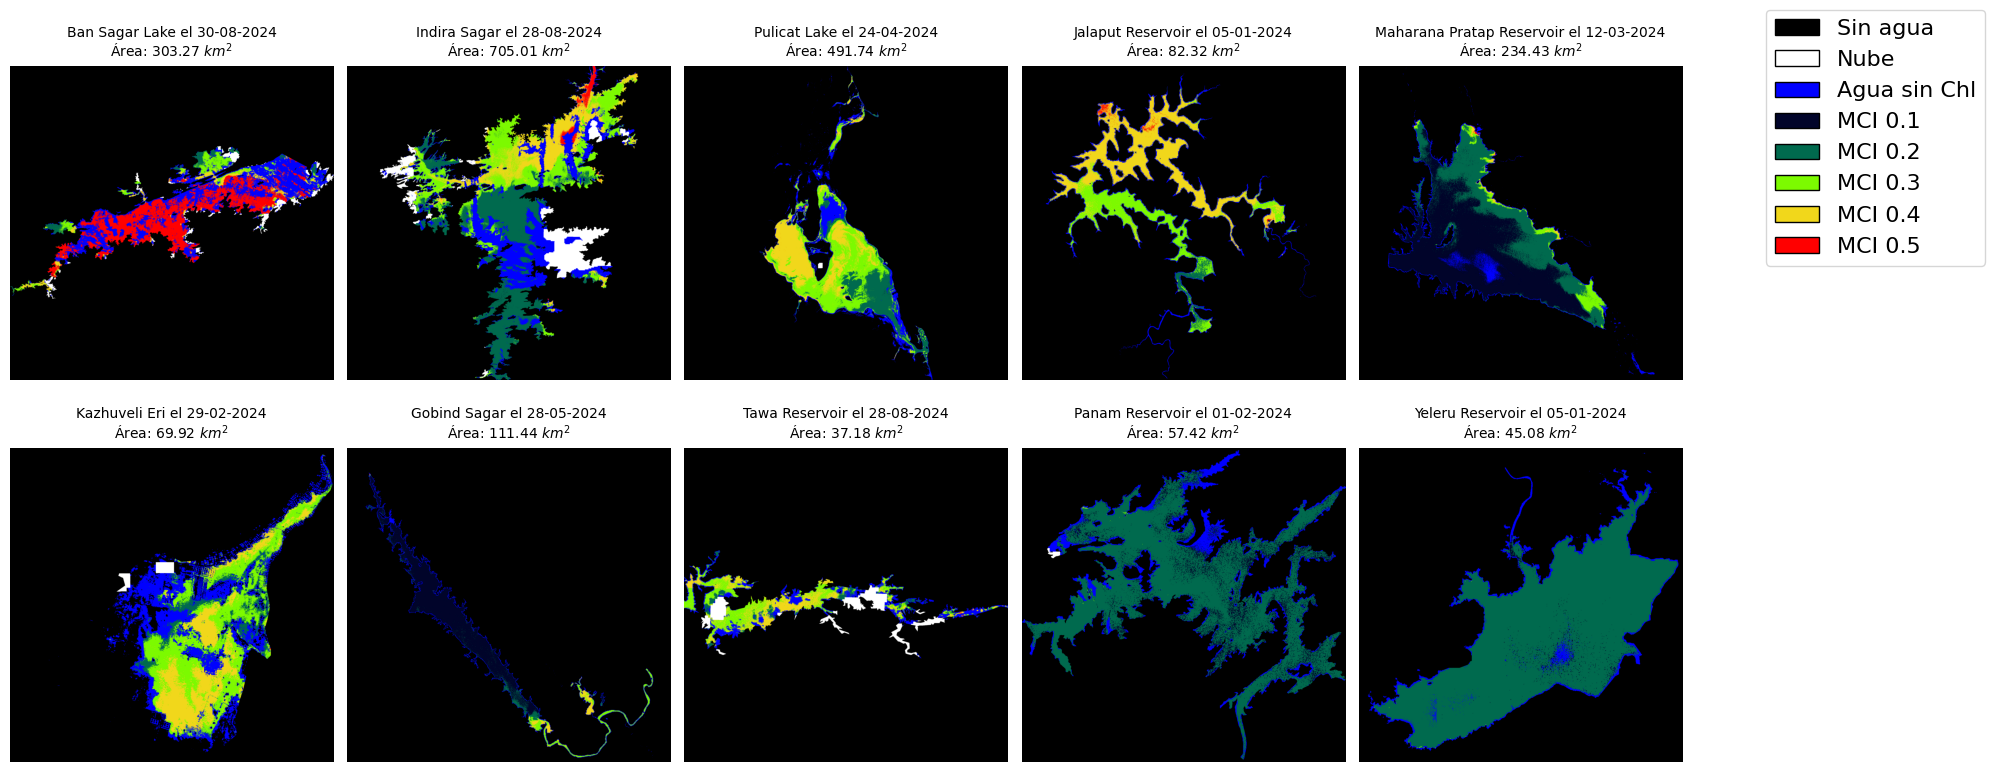

In [104]:
utils.plot_all_transformed_images(first_10_exp)

In [11]:
first_10_lineal

,osmid,day,exists_true_image,water_area,cloud_area,water_with_no_clouds_area,no_chl_area,chl_very_low_area,chl_low_area,chl_moderate_area,...,pixel_count,total_pixel_area,resolution,max_water_area,max_water_with_no_clouds_area,count_records,cloud_ratio,water_ratio,chl_lineal,chl_exp
155,2810519,2024-08-28,True,705009375.0,87864375.0,622226250.0,176038125.0,901250.0,190400625.0,147178125.0,...,1144148,715092500,25,705009375.0,633815000.0,12,0.124629,0.985900,2.901856e+10,6.199974e+10
100,1624070,2024-04-24,True,348561250.0,773125.0,348560625.0,70001875.0,156250.0,66714375.0,119415000.0,...,1053149,658218125,25,491740000.0,398895625.0,18,0.001572,0.747078,1.966915e+10,4.387191e+10
102,16288976,2024-08-30,True,303271875.0,17234375.0,286690625.0,123650000.0,8125.0,10586875.0,19644375.0,...,481959,301224375,25,303271875.0,292830625.0,25,0.056828,1.006797,1.637147e+10,7.039277e+10
168,332072,2024-03-12,True,156739500.0,0.0,156739500.0,13126275.0,89443575.0,46089000.0,6921000.0,...,1039287,233839575,15,234426600.0,181516500.0,12,0.000000,1.002510,5.029579e+09,6.880250e+09
182,357472,2024-01-05,True,51203500.0,0.0,51203500.0,10930800.0,7900.0,2430900.0,13609600.0,...,878103,87810300,10,82322300.0,51203500.0,13,0.000000,0.937502,3.246799e+09,8.429673e+09
93,1601368,2024-01-02,True,111443600.0,1749200.0,110698800.0,11439600.0,90998400.0,8246400.0,14000.0,...,324139,129655600,20,111443600.0,110698800.0,12,0.015696,0.859536,2.707712e+09,3.326999e+09
306,8026438,2024-02-01,True,57297000.0,121400.0,57177700.0,8785500.0,6552600.0,41798600.0,38900.0,...,583661,58366100,10,57422900.0,57422900.0,27,0.002114,0.983840,2.136862e+09,2.840171e+09
89,156782315,2024-02-29,True,39443900.0,648100.0,39197100.0,13579800.0,4900.0,3733800.0,13326300.0,...,729241,72924100,10,69919400.0,43276100.0,32,0.009269,0.958797,1.862249e+09,4.198791e+09
91,1579454,2024-01-05,True,35180250.0,0.0,35180250.0,2848900.0,422425.0,31897250.0,11575.0,...,1916439,47910975,5,45084825.0,35180250.0,11,0.000000,0.941012,1.512652e+09,2.023509e+09
282,7876724,2024-02-10,True,109225800.0,0.0,109225800.0,70127100.0,18009225.0,20978100.0,105975.0,...,598628,134691300,15,121448025.0,119443950.0,23,0.000000,0.901677,1.453875e+09,1.891701e+09


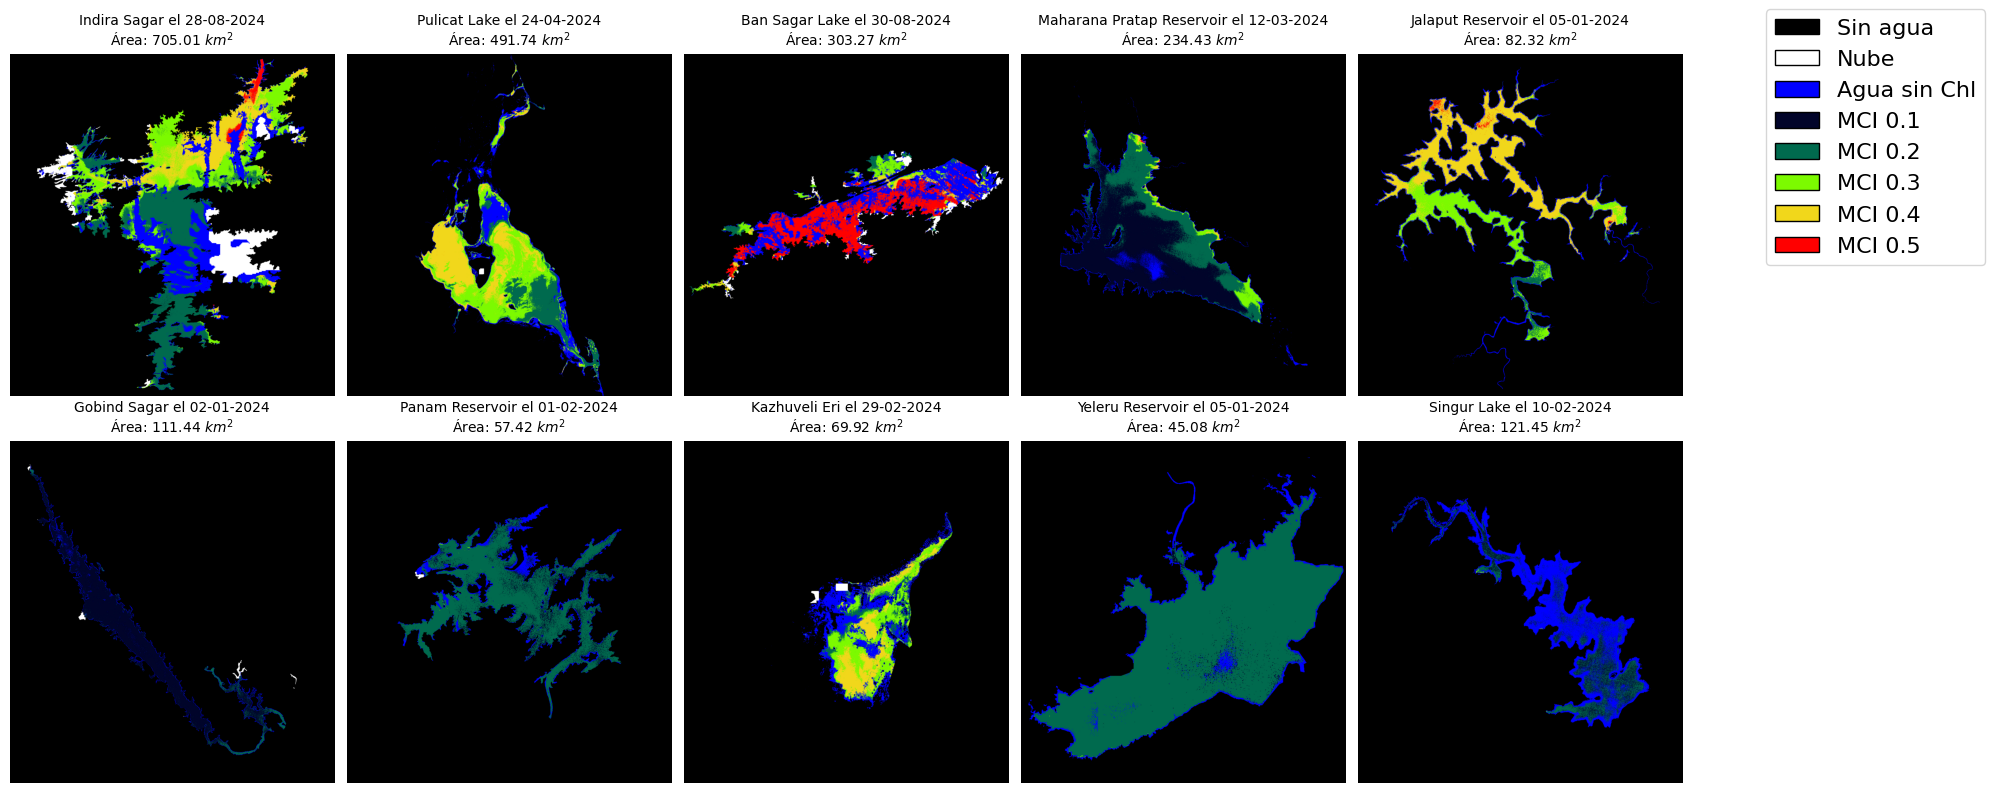

In [11]:
utils.plot_all_transformed_images(first_10_lineal)

In [12]:
top_osmid_lineal = set(first_10_lineal.osmid.unique())
top_osmid_exp = set(first_10_exp.osmid.unique())
print(top_osmid_lineal)
print(top_osmid_exp)




{'7876724', '1579454', '357472', '2810519', '1624070', '156782315', '16288976', '332072', '1601368', '8026438'}
{'1579454', '357472', '8026438', '2810519', '1624070', '156782315', '16288976', '332072', '1601368', '58680339'}


#### Clustering

In [13]:
df_post_grouped

,osmid,day,exists_true_image,water_area,cloud_area,water_with_no_clouds_area,no_chl_area,chl_very_low_area,chl_low_area,chl_moderate_area,...,pixel_count,total_pixel_area,resolution,max_water_area,max_water_with_no_clouds_area,count_records,cloud_ratio,water_ratio,chl_lineal,chl_exp
0,1624070,2024-01-25,True,443616875.0,199115000.0,342863125.0,144963125.0,45625.0,39214375.0,88605625.0,...,1053149,658218125,25,491740000.0,398895625.0,18,0.404919,0.747078,1.426630e+10,3.252183e+10
1,1624070,2024-03-05,True,331030625.0,88051250.0,305414375.0,65399375.0,222500.0,93954375.0,126409375.0,...,1053149,658218125,25,491740000.0,398895625.0,18,0.179061,0.747078,1.485697e+10,2.729630e+10
2,1624070,2024-04-14,True,382576250.0,27640000.0,362883750.0,104605000.0,428750.0,144733125.0,84498750.0,...,1053149,658218125,25,491740000.0,398895625.0,18,0.056209,0.747078,1.522360e+10,2.777030e+10
3,1624070,2024-05-24,True,390539375.0,11503750.0,382618750.0,150752500.0,362500.0,159971875.0,47721250.0,...,1053149,658218125,25,491740000.0,398895625.0,18,0.023394,0.747078,1.299901e+10,2.296277e+10
4,1624070,2024-07-03,True,462668750.0,454092500.0,192956250.0,192954375.0,0.0,1875.0,0.0,...,1053149,658218125,25,491740000.0,398895625.0,18,0.923440,0.747078,8.823750e+04,1.180922e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4169,999679411,2024-07-01,True,0.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,38683,967075,5,982400.0,240600.0,26,1.000000,1.015847,0.000000e+00,0.000000e+00
4170,999679411,2024-05-22,True,0.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,38683,967075,5,982400.0,240600.0,26,1.000000,1.015847,0.000000e+00,0.000000e+00
4171,999679411,2024-04-12,True,85425.0,982400.0,0.0,0.0,0.0,0.0,0.0,...,38683,967075,5,982400.0,240600.0,26,1.000000,1.015847,0.000000e+00,0.000000e+00
4172,999679411,2024-03-03,True,525400.0,838875.0,139850.0,139850.0,0.0,0.0,0.0,...,38683,967075,5,982400.0,240600.0,26,0.853904,1.015847,0.000000e+00,0.000000e+00


In [14]:
cluster_df = df_post_grouped[(df_post_grouped["cloud_ratio"]<0.10) & (df_post_grouped["water_with_no_clouds_area"]>500000)].copy()
cluster_df.loc[:, "no_chl_ratio"] = df_post_grouped["no_chl_area"]/df_post_grouped["water_with_no_clouds_area"]
cluster_df.loc[:, "very_low_chl_ratio"] = df_post_grouped["chl_very_low_area"]/df_post_grouped["water_with_no_clouds_area"]
cluster_df.loc[:, "low_chl_ratio"] = df_post_grouped["chl_low_area"]/df_post_grouped["water_with_no_clouds_area"]
cluster_df.loc[:, "moderate_chl_ratio"] = df_post_grouped["chl_moderate_area"]/df_post_grouped["water_with_no_clouds_area"]
cluster_df.loc[:, "high_chl_ratio"] = df_post_grouped["chl_high_area"]/df_post_grouped["water_with_no_clouds_area"]
cluster_df.loc[:, "very_high_chl_ratio"] = df_post_grouped["chl_very_high_area"]/df_post_grouped["water_with_no_clouds_area"]
cluster_df = cluster_df.dropna()
cluster_df = cluster_df[["osmid", "day", "very_low_chl_ratio","low_chl_ratio", "moderate_chl_ratio", "high_chl_ratio", "very_high_chl_ratio"]]

In [15]:
cluster_df

,osmid,day,very_low_chl_ratio,low_chl_ratio,moderate_chl_ratio,high_chl_ratio,very_high_chl_ratio
2,1624070,2024-04-14,0.001182,0.398842,0.232853,0.076359,0.002504
3,1624070,2024-05-24,0.000947,0.418097,0.124723,0.057663,0.004567
13,25394157,2024-03-05,0.000064,0.363009,0.300028,0.000355,0.000006
15,25394157,2024-05-24,0.000027,0.013394,0.055311,0.000066,0.000000
23,82611270,2024-08-12,0.009610,0.568773,0.239969,0.025850,0.021176
...,...,...,...,...,...,...,...
4016,9319304,2024-05-02,0.000000,0.000000,0.000000,0.000000,0.000000
4020,9319304,2024-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
4084,97868797,2024-02-12,0.065399,0.196682,0.000000,0.000000,0.000000
4085,97868797,2024-03-23,0.020120,0.098708,0.000000,0.000000,0.000000


Centroides de los clusters:
   very_low_chl_ratio  low_chl_ratio  moderate_chl_ratio  high_chl_ratio  \
0            0.519127       0.176948            0.005520        0.001903   
1            0.024706       0.160739            0.013579        0.007177   
2            0.000045       0.005689            0.017539        0.272511   
3            0.001600       0.199605            0.363657        0.110848   

   very_high_chl_ratio  
0             0.000115  
1             0.003394  
2             0.397640  
3             0.005992  


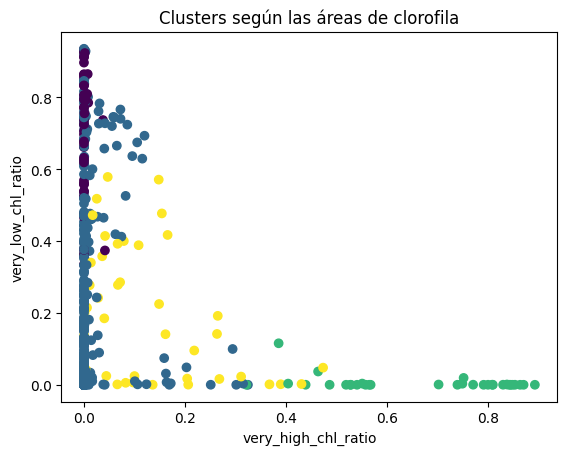

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supongo que cluster_df ya contiene las columnas de concentraciones de clorofila
# Normalizar los datos (excluyendo la columna 'cluster', si ya la tienes)
scaler = StandardScaler()
chl_scaled = scaler.fit_transform(cluster_df.drop(columns=['cluster', 'osmid', 'day'], errors='ignore'))

# Aplicar KMeans con 3 clusters (altas, medias, bajas concentraciones)
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_df.loc[:,'cluster'] = kmeans.fit_predict(chl_scaled)

# Analizar los centroides de los clusters (excluyendo la columna 'cluster')
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=cluster_df.columns[2:-1])
print("Centroides de los clusters:")
print(centroids)

# Graficar los clusters (opcional) usando dos variables relevantes
plt.scatter(cluster_df['high_chl_ratio'] + cluster_df["very_high_chl_ratio"], cluster_df['low_chl_ratio'] + cluster_df['very_low_chl_ratio'], c=cluster_df['cluster'], cmap='viridis')
plt.xlabel('very_high_chl_ratio')
plt.ylabel('very_low_chl_ratio')
plt.title('Clusters según las áreas de clorofila')
plt.show()

In [17]:
top_cluster_df = cluster_df[cluster_df["cluster"]==2].copy()
top_osmid_cluster = set(top_cluster_df.osmid.unique())
print(top_osmid_cluster)

{'25394523', '25474612', '34108030', '92001285', '6743775', '24711461', '137356318', '16288976', '29894997', '8421510', '117699391', '171201578', '41667728', '115769453', '1606905'}


In [18]:
top_cluster_df

,osmid,day,very_low_chl_ratio,low_chl_ratio,moderate_chl_ratio,high_chl_ratio,very_high_chl_ratio,cluster
38,25474612,2024-04-19,0.000000,0.000070,0.061404,0.438561,0.000000,2
73,34108030,2024-03-05,0.000871,0.114615,0.102603,0.381465,0.003674,2
112,117699391,2024-08-10,0.000109,0.000705,0.004554,0.696013,0.140790,2
557,115769453,2024-03-30,0.000000,0.000000,0.001653,0.516037,0.041163,2
563,115769453,2024-01-05,0.000000,0.002984,0.040896,0.320460,0.428172,2
577,115769453,2024-01-10,0.000000,0.019093,0.062845,0.602269,0.148826,2
1130,137356318,2024-01-04,0.000000,0.000709,0.002276,0.519870,0.181723,2
1308,1606905,2024-01-03,0.000000,0.000000,0.000000,0.363687,0.200577,2
1309,1606905,2024-02-12,0.000000,0.000000,0.000000,0.234915,0.634853,2
1310,1606905,2024-01-28,0.000000,0.000000,0.000000,0.001286,0.890801,2


In [20]:
top_cluster_df.loc[:, "high_or_very_high_ratio"] = top_cluster_df["high_chl_ratio"] + top_cluster_df["very_high_chl_ratio"]
top15cluster = top_cluster_df.sort_values(by="high_or_very_high_ratio", ascending=False).groupby('osmid').first().sort_values(by="high_or_very_high_ratio", ascending=False).reset_index().copy()
key_columns = ['osmid', 'day']

top15clustermerged = top15cluster.merge(df_post_grouped, on=key_columns, how='left')

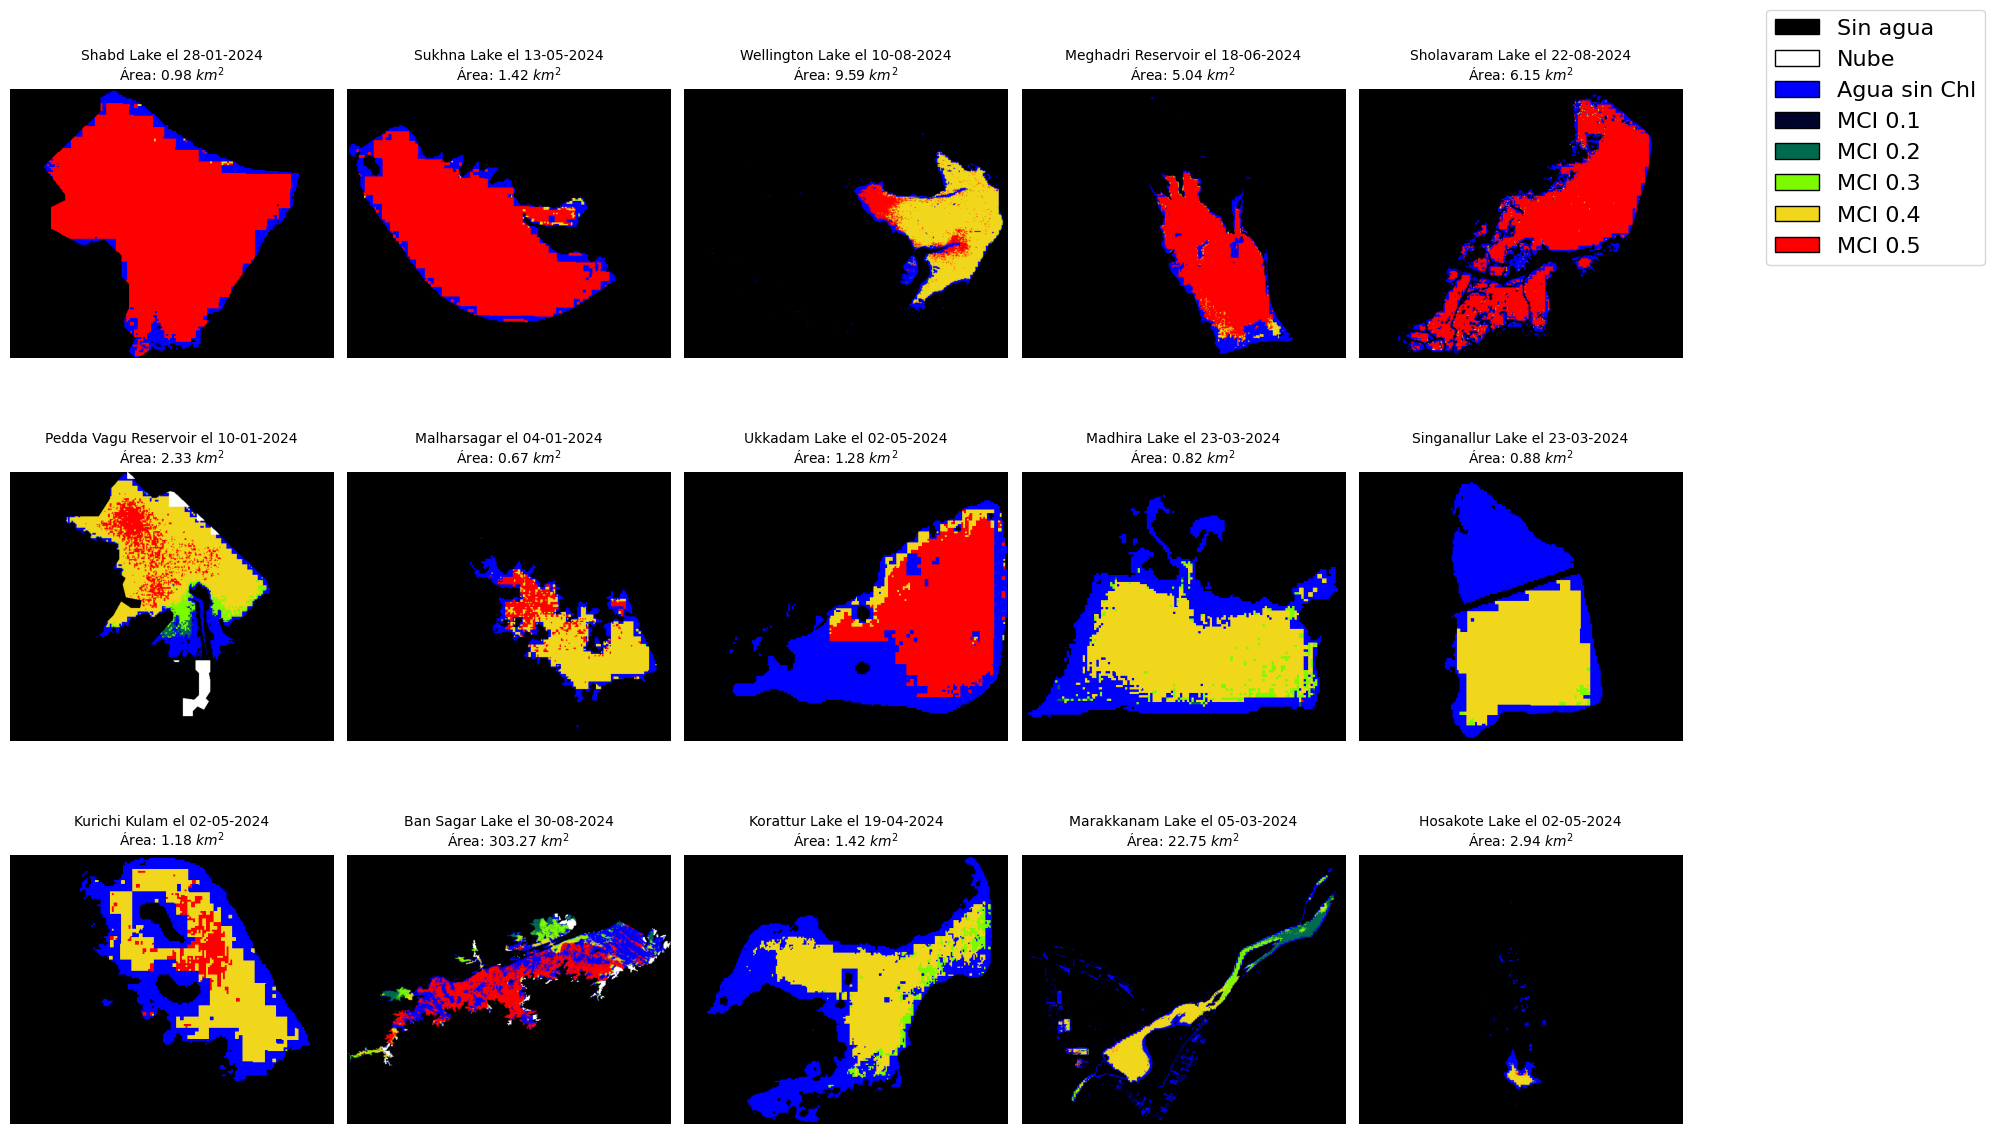

In [101]:
utils.plot_all_transformed_images(top15clustermerged)

In [22]:
top_osmids = top_osmid_cluster.union(top_osmid_lineal).union(top_osmid_exp)

In [23]:
top_osmids

{'115769453',
 '117699391',
 '137356318',
 '156782315',
 '1579454',
 '1601368',
 '1606905',
 '1624070',
 '16288976',
 '171201578',
 '24711461',
 '25394523',
 '25474612',
 '2810519',
 '29894997',
 '332072',
 '34108030',
 '357472',
 '41667728',
 '58680339',
 '6743775',
 '7876724',
 '8026438',
 '8421510',
 '92001285'}

In [29]:
top_logs = df[df['osmid'].isin(top_osmids)]
top_lakes = all_lakes[all_lakes['osmid'].isin(top_osmids)]
top_lakes.to_csv(f"{utils.get_data_directory()}/top_lakes.csv", index = False)
top_lakes.to_csv(r"../data/top_lakes.csv", index = False)

In [18]:
ban_sagar_logs = all_saved_logs[all_saved_logs["osmid"] == '16288976']